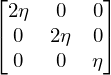

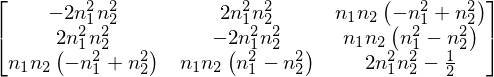

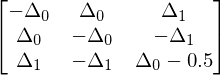

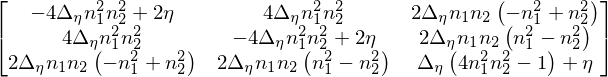

In [2]:
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
from sympy import *
from IPython.display import display
from sympy import symbols, evalf, lambdify, cos, sqrt, sin, simplify, expand, factor, init_printing, integrate, Matrix
from sympy.solvers import solve
init_printing(use_unicode=True)
eta,eta_s,diff_eta,eta_d,n1,n2,D11,D22,D12,d0,d1 = symbols('eta,eta_s,Delta_eta,eta_d,n1,n2,D_11,D_22,D_12,Delta0,Delta1')

##############################################################################################
# Derivation of the components of the anisotropic matrix following Mühlhaus et al., IJSS, 2002
R            = Matrix(2,2,[n2,-n1,n1,n2])                        # Rotation matrix
Rt           = R.transpose()                                     # Transpose of R
D_xy_vec     = Matrix(3,1,[D11,D22,D12/2])                       # Strain rate vector for Eulerian x-y space
D_xy         = Matrix(2,2,[D11,D12/2,D12/2,D22])                 # Strain rate tensor
# Local stiffness matrix with shear direction parallel to layering, which causes anisotropy
C_ns         = Matrix(3,3,[2*eta,0,0, 0,2*eta,0, 0,0,2*eta_s])   
# Rotate Eulerian strain rates to local coordinate system defined by layering
D_ns         = Rt*D_xy*R
D_ns_vec     = Matrix(3,1,[D_ns[0,0],D_ns[1,1],D_ns[1,0]])       # Strain rate vector for local space 
S_ns_vec     = C_ns*D_ns_vec                                     # Stress vector for local space
# Local stress tensor
S_ns         = Matrix(2,2,[S_ns_vec[0],S_ns_vec[2],S_ns_vec[2],S_ns_vec[1]])
S_xy         = R*S_ns*Rt                                         # Rotate stress tensor to Eulerian x-y-space 
S_xy_vec     = Matrix(3,1,[S_xy[0,0],S_xy[1,1],S_xy[0,1]])       # Stress vector for Eulerian x-y space
# Defining isotropic stiffness matrix in Eulerian x-y space
C_iso        = Matrix(3,3,[2*eta,0,0, 0,2*eta,0, 0,0,1*eta])
D_xy_vec2    = Matrix(3,1,[D11,D22,D12])
S_iso_xy_vec = C_iso*D_xy_vec2                                     # Isotropic stress vector in Eulerian space
S_ani_xy_vec = factor( expand(S_xy_vec - S_iso_xy_vec) )          # Anisotropic stress is total stress minus isotropic stress
# Now the coefficients for the anisotropic stiffness matrix have to be collected
# The substitutions are reformulations are done to have the same components as in Mühlhaus et al. 2002, eqn (8) 
C_ani_11     = (S_ani_xy_vec[0]).coeff(D11)
C_ani_11a    = C_ani_11 + 4*eta*n1**2*n2**2 - 4*eta_d*n1**2*n2**2 
C_ani_11b    = C_ani_11a.subs(eta_d,diff_eta+eta_s)
# IMPORTANT TRIGONOMETRIC IDENDITY; n1 = -sin(angle) and n2 = cos(angle); direction cosine
# eta can be set to zero because the term multiplied by eta is zero, because n1^2+n2^2 = 1, therefore
# (n1^2+n2^2)*(n1^2+n2^2) = n1^4 + 2*n1^2*n2^2 + n2^4 = 1*1 = 1; hence n1^4 + 2*n1^2*n2^2 + n2^4 - 1 = 0 
C_ani_11c    = simplify(C_ani_11b.subs(eta,0))

C_ani_12     = (S_ani_xy_vec[0]).coeff(D22)
C_ani_12     = factor(C_ani_12.subs(eta,diff_eta+eta_s))

C_ani_13     = (S_ani_xy_vec[0]).coeff(D12)
C_ani_13     = simplify(C_ani_13.subs(eta,diff_eta+eta_s))

C_ani_23     = (S_ani_xy_vec[1]).coeff(D12)
C_ani_23     = simplify(C_ani_23.subs(eta,diff_eta+eta_s))

C_ani_33     = (S_ani_xy_vec[2]).coeff(D12)
C_ani_33a    = C_ani_33 + 4*eta_s*n1**2*n2**2 - 4*eta_d*n1**2*n2**2 - eta_s/1 + eta_d/1 
C_ani_33b    = simplify(C_ani_33a.subs(eta_d,eta-diff_eta))
C_ani_33c    = simplify(C_ani_33b.subs(eta_s,0))

C_ani        = Matrix(3,3,[C_ani_11c,C_ani_12,C_ani_13,C_ani_12,C_ani_11c,C_ani_23,C_ani_13,C_ani_23,C_ani_33c])
C_ani_basic  = Matrix(3,3,[C_ani_11c/(2*diff_eta),C_ani_12/(2*diff_eta),C_ani_13/(2*diff_eta),C_ani_12/(2*diff_eta),C_ani_11c/(2*diff_eta),C_ani_23/(2*diff_eta),C_ani_13/(2*diff_eta),C_ani_23/(2*diff_eta),C_ani_33c/(2*diff_eta)])
D            = C_iso + C_ani
S_tot_xy     = D*D_xy_vec

Delta_0      = 2*n1**2*n2**2
Delta_1      = n1*n2*(-n1**2+n2**2)
C_ani_sym    = Matrix(3,3,(-d0,d0,d1,d0,-d0,-d1,d1,-d1,d0-1/2))
#display( C_ani_11c )
#display( C_ani_12  )
#display( C_ani_13  )
#display( C_ani_23  )
#display( C_ani_33c )

display(C_iso)
display(C_ani_basic)
#display(D)

#display(simplify(C_ani_basic))
display(Delta_0)
display(Delta_1)
display(C_ani_sym)
#display(D)
#display(simplify(S_tot_xy))

display(D[2,2].subs(n2,0))

display(D)
